<a href="https://colab.research.google.com/github/Monisha-11/mnist-classification/blob/main/DLEXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[4]

In [ ]:
single_image.shape

(28, 28)

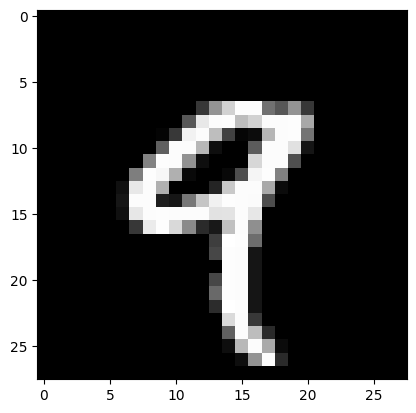

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[4]

9

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

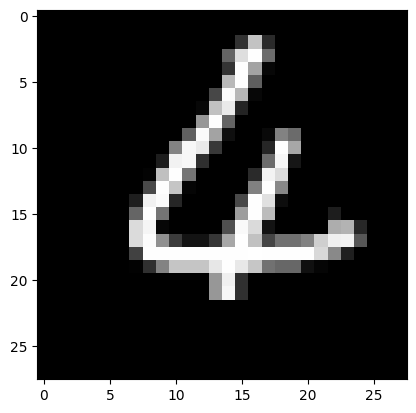

In [ ]:
single_image = X_train[850]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[850]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=42,kernel_size=(4,4),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(74,activation="relu"))
model.add(layers.Dense(84,activation="relu"))
model.add(layers.Dense(94,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 42)        714       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 42)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1512)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                96832     
                                                                 
 dense_6 (Dense)             (None, 74)                4810      
                                                                 
 dense_7 (Dense)             (None, 84)                6300      
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=7,
          batch_size=84,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/7
715/715 [==============================] - 45s 57ms/step - loss: 0.2557 - accuracy: 0.9203 - val_loss: 0.0621 - val_accuracy: 0.9791
Epoch 2/7
715/715 [==============================] - 27s 37ms/step - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.0653 - val_accuracy: 0.9787
Epoch 3/7
715/715 [==============================] - 27s 37ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 4/7
715/715 [==============================] - 27s 38ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0542 - val_accuracy: 0.9829
Epoch 5/7
715/715 [==============================] - 27s 37ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 6/7
715/715 [==============================] - 28s 39ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 7/7
715/715 [==============================] - 26s 37ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.0389 - val_accuracy: 0.9889

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.255664,0.920267,0.062104,0.9791
1,0.072941,0.977483,0.065337,0.9787
2,0.052539,0.984017,0.044700,0.9858
3,0.042058,0.987283,0.054220,0.9829
4,0.033851,0.989000,0.038595,0.9877


<Axes: >

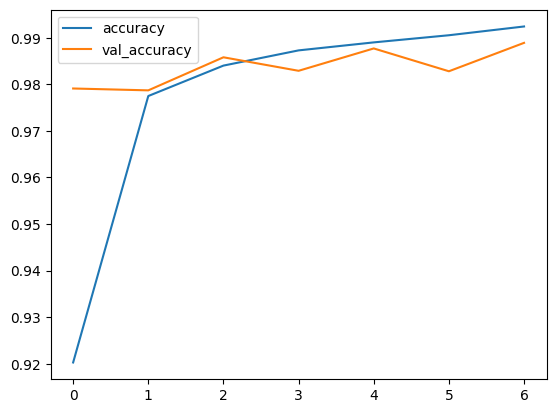

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

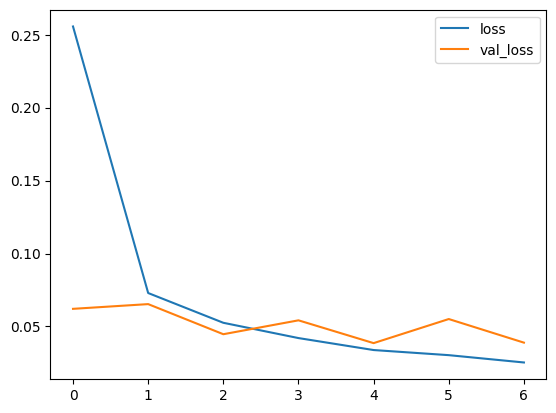

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1122    3    1    0    1    6    1    1    0]
 [   1    0 1027    0    0    0    0    3    1    0]
 [   0    0    3 1004    0    0    0    1    2    0]
 [   0    0    0    0  966    0    3    2    1   10]
 [   2    0    0   15    0  871    2    0    1    1]
 [   0    1    0    0    1    2  953    0    1    0]
 [   0    0    8    0    0    0    0 1018    1    1]
 [   1    0    4    3    0    0    1    2  961    2]
 [   0    0    1    2    2    4    0    7    2  991]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('RM.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('RM.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 42ms/step


In [ ]:
print(x_single_prediction)

[0]


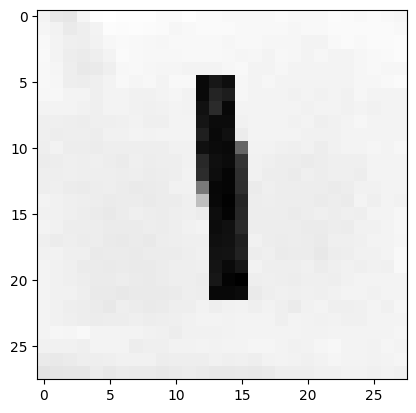

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(x_single_prediction)

[1]


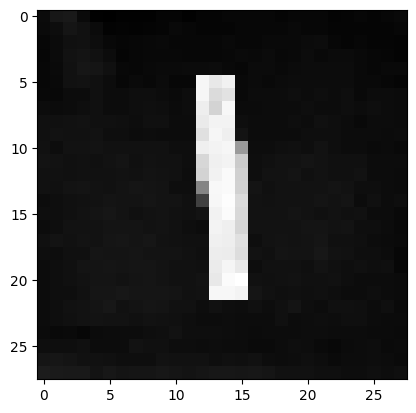

In [ ]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')